# Capstone Two - EDA 

In [1]:
#import the necessary packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
rawsalarydata = pd.read_csv('ds_salaries.csv')

In [4]:
rawsalarydata.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
# first thing I noticed is the extra 'Unamed' column that we need to drop

In [6]:
clean_salary_data = rawsalarydata.drop('Unnamed: 0', axis=1)

In [7]:
clean_salary_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [8]:
# next I want a better picture of what is in each column to get a better idea of what might needing some cleaning up

In [9]:
clean_salary_data['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [10]:
# some seem like they could be one in the same, will need to come back for some regrouping during preprocessing

In [11]:
clean_salary_data['work_year'].unique()

array([2020, 2021, 2022])

In [12]:
# no strange categories present or mistyped years

In [13]:
clean_salary_data['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [14]:
# original data set states these definitions:
# MI - mid-level / intermediate
# SE - senior-level
# EN - entry-level / junior
# EX - expert-level / Director
# no strange categories or misspellings present, nothing to clean

In [15]:
clean_salary_data['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [16]:
# original data set states these definitions:
# FT - Fulltime
# CT - Contract
# PT - Parttime
# FL - Freelance
# no strange categories present or misspellings, nothing to clean

In [17]:
sorted(clean_salary_data['salary'].unique())

[4000,
 8000,
 8760,
 9272,
 10000,
 12000,
 13400,
 14000,
 18000,
 19000,
 20000,
 21000,
 21600,
 21844,
 22000,
 24000,
 25000,
 28500,
 29000,
 30000,
 31000,
 32000,
 34000,
 35000,
 37000,
 37456,
 38400,
 39600,
 40000,
 40900,
 41000,
 42000,
 43200,
 44000,
 45000,
 45760,
 48000,
 50000,
 51400,
 51999,
 52000,
 52500,
 52800,
 53000,
 54000,
 55000,
 56000,
 57000,
 58000,
 59000,
 60000,
 61300,
 61500,
 62000,
 63900,
 65000,
 65720,
 66500,
 67000,
 68000,
 69000,
 69600,
 69999,
 70000,
 70500,
 72000,
 72500,
 73000,
 74000,
 75000,
 76760,
 78000,
 80000,
 81000,
 81666,
 82500,
 82900,
 84900,
 85000,
 87000,
 88000,
 90000,
 90320,
 90700,
 91000,
 93000,
 93150,
 93700,
 95000,
 95550,
 98000,
 99000,
 99050,
 99100,
 99360,
 100000,
 100800,
 101570,
 102000,
 102100,
 103000,
 104890,
 105000,
 105400,
 106000,
 106260,
 108000,
 108800,
 109000,
 109280,
 110000,
 110500,
 110925,
 111775,
 112000,
 112300,
 112900,
 113000,
 115000,
 115500,
 115934,
 116000,
 

In [18]:
# Highest value appears to be $30.4 mil, I doubt it's an error. Likely a director position or executive level or
# is in another currency other than USD.
# Lowest is $4k, likely a freelander or contract, doesn't appear to be a mistype or anything, no further cleaning

In [19]:
clean_salary_data['salary_currency'].unique()

array(['EUR', 'USD', 'GBP', 'HUF', 'INR', 'JPY', 'CNY', 'MXN', 'CAD',
       'DKK', 'PLN', 'SGD', 'CLP', 'BRL', 'TRY', 'AUD', 'CHF'],
      dtype=object)

In [20]:
# Acronyms:
# EUR - Euro
# USD - United Sates Dollar
# GBP - Pound sterling
# HUF - Hungarian forint
# INR - Indian rupee
# JPY - Japanese yen
# CNY - Chinese Yuan 
# MXN - Mexican peso
# CAD - Canadian dollar
# DKK - Danish krone
# PLN - Polish złoty
# SGD - Singapore dollar
# CLP - Chilean peso
# BRL - Brazilian real
# TRY - Turkish lira
# AUD - Australian dollar
# CHF - Swiss franc
# Found these are are legitimate forms of currency and no mistypes, no further cleaning needed 

In [21]:
sorted(clean_salary_data['salary_in_usd'].unique())

[2859,
 4000,
 5409,
 5679,
 5707,
 5882,
 6072,
 8000,
 9272,
 9466,
 10000,
 10354,
 12000,
 12103,
 12901,
 13400,
 15966,
 16228,
 16904,
 18000,
 18053,
 18442,
 18907,
 19609,
 20000,
 20171,
 21637,
 21669,
 21844,
 21983,
 22611,
 24000,
 24342,
 24823,
 25000,
 25532,
 26005,
 28016,
 28369,
 28399,
 28476,
 28609,
 29751,
 30428,
 31615,
 31875,
 32974,
 33511,
 33808,
 35590,
 35735,
 36259,
 36643,
 37236,
 37300,
 37825,
 38400,
 38776,
 39263,
 39916,
 40000,
 40038,
 40189,
 40481,
 40570,
 41689,
 42000,
 42197,
 43331,
 43966,
 45391,
 45618,
 45760,
 45807,
 45896,
 46597,
 46759,
 46809,
 47282,
 47899,
 48000,
 49268,
 49461,
 49646,
 50000,
 50180,
 51064,
 51321,
 51519,
 52000,
 52351,
 52396,
 53192,
 54000,
 54094,
 54238,
 54742,
 54957,
 55000,
 56000,
 56256,
 56738,
 58000,
 58035,
 58255,
 58894,
 59102,
 59303,
 60000,
 60757,
 61300,
 61467,
 61896,
 62000,
 62649,
 62651,
 62726,
 63711,
 63810,
 63831,
 63900,
 64849,
 65000,
 65013,
 65438,
 65949,
 6

In [22]:
# Lowest is $2,859 - likely freelance or contract
# Highest is $600,000 - likely a director or executive level. 
# All seem within normal range of USD with no obvious outliers, no further cleaning needed on this column

In [23]:
clean_salary_data['employee_residence'].unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'PL',
       'PT', 'CN', 'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'PH', 'ES',
       'DK', 'RU', 'IT', 'HR', 'BG', 'SG', 'BR', 'IQ', 'VN', 'BE', 'UA',
       'MT', 'CL', 'RO', 'IR', 'CO', 'MD', 'KE', 'SI', 'HK', 'TR', 'RS',
       'PR', 'LU', 'JE', 'CZ', 'AR', 'DZ', 'TN', 'MY', 'EE', 'AU', 'BO',
       'IE', 'CH'], dtype=object)

In [24]:
# quick overview, all are two letters and in uniform to the ISO 3166 country code, no further cleaning needed

In [25]:
clean_salary_data['remote_ratio'].unique()

array([  0,  50, 100])

In [26]:
# only three categories for remote work:
# 0 - remote work is < 20%, considered in office fully
# 50 - hybrid
# 100 - > 80% remote, considered fully remote
# no outliers noted, no further cleaning needed

In [27]:
clean_salary_data['company_location'].unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE'], dtype=object)

In [28]:
clean_salary_data['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

In [29]:
# onnly three categories for company size:
# S - 'small', < 50 employees
# M - 'medium', 50 - 250 employees
# L - 'large', > 250 empoloyees

In [30]:
# general once over for anything we might be missing

In [31]:
clean_salary_data.isnull().values.any()

False

# # EDA SECTION

In [33]:
#let's get a general once over again of the data and what we are looking at 
clean_salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [35]:
# MI - mid-level / intermediate
# SE - senior-level
# EN - entry-level / junior
# EX - expert-level / Director
# I'm more interested in the EN 

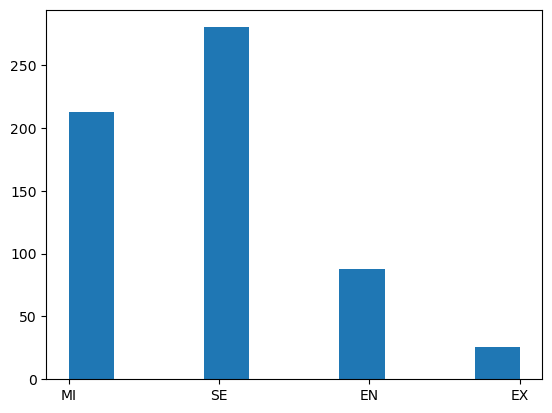

In [34]:
#so what i'm really curious about is job titles, salaries, and level of experience to get a better idea of them
explvlhist = plt.hist(clean_salary_data['experience_level'])
plt.show()

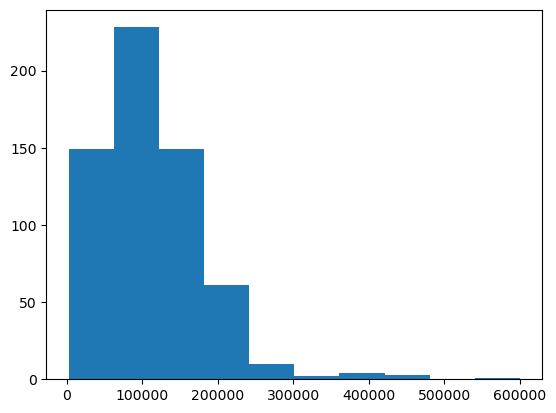

In [39]:
salhist = plt.hist(clean_salary_data['salary_in_usd'])
plt.show()

In [57]:
salbasicstats = clean_salary_data['salary_in_usd'].describe()
print(salbasicstats)

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64


In [44]:
clean_salary_data.corr()

/var/folders/2r/1ydm5z_940ngn4rb5wwtjkq40000gn/T/ipykernel_52274/393476950.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  clean_salary_data.corr()


,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.087577,0.170493,0.076314
salary,-0.087577,1.000000,-0.083906,-0.014608
salary_in_usd,0.170493,-0.083906,1.000000,0.132122
remote_ratio,0.076314,-0.014608,0.132122,1.000000


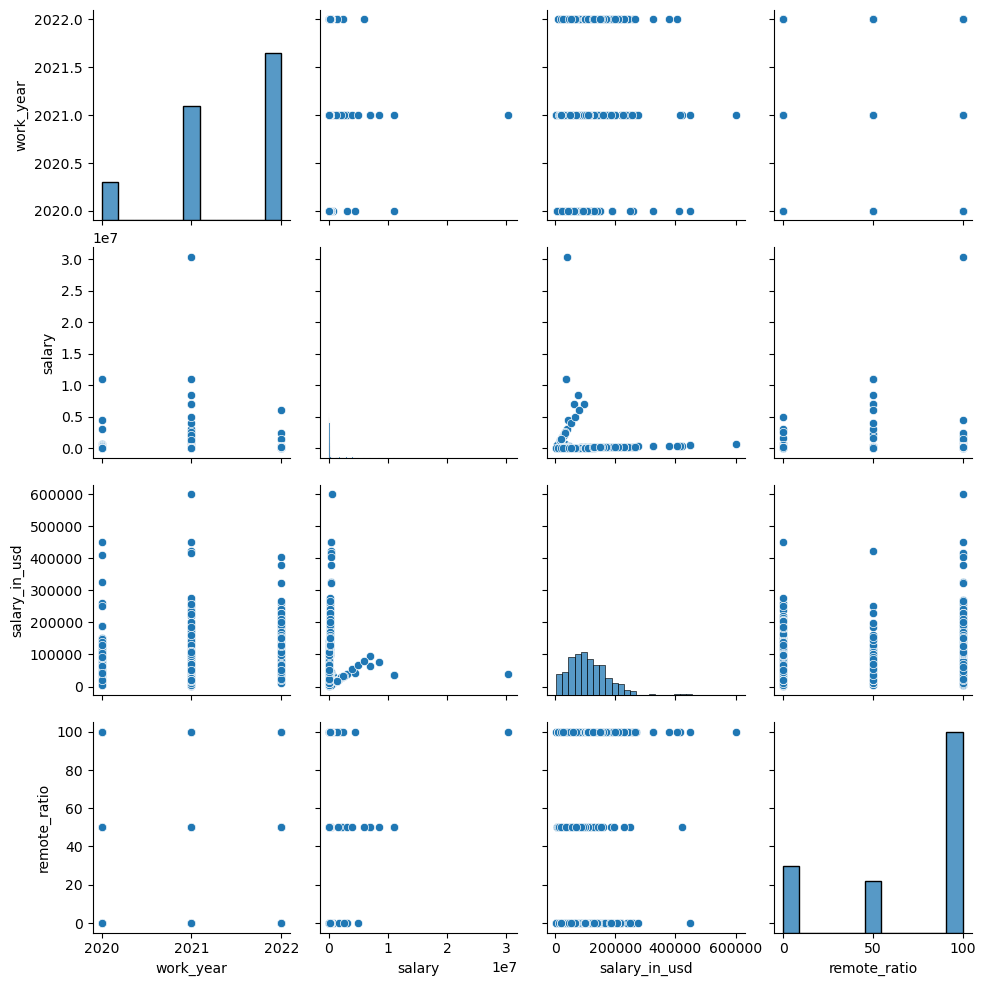

In [45]:
sns.pairplot(clean_salary_data)
plt.show()

/var/folders/2r/1ydm5z_940ngn4rb5wwtjkq40000gn/T/ipykernel_52274/678102786.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cleansalarycorr = clean_salary_data.corr()


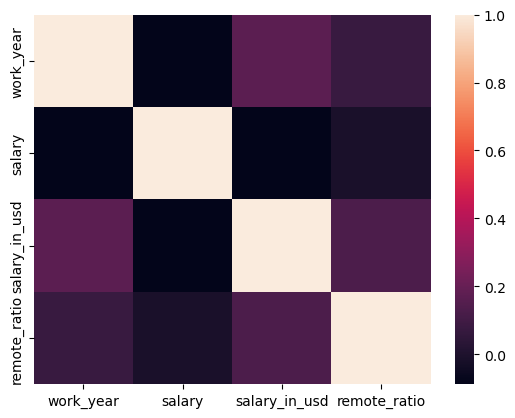

In [46]:
cleansalarycorr = clean_salary_data.corr()
sns.heatmap(cleansalarycorr)
plt.show()

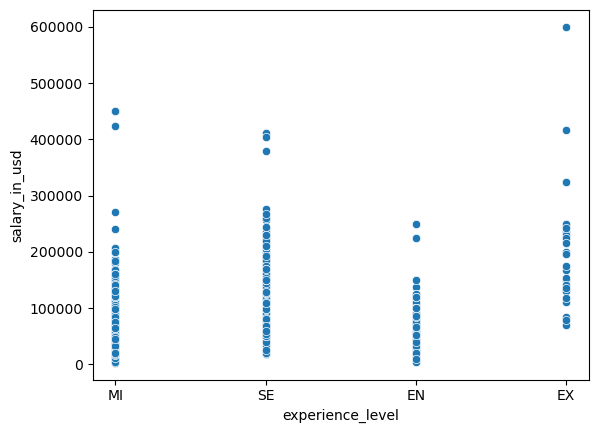

In [49]:
_ = sns.scatterplot(data = clean_salary_data, x=clean_salary_data['experience_level'], y=clean_salary_data['salary_in_usd'])

In [53]:
import scipy.stats

In [59]:
x = clean_salary_data['remote_ratio']
y = clean_salary_data['salary_in_usd']

In [60]:
_ = np.corrcoef(x, y)

In [61]:
print(_)

[[1.         0.13212234]
 [0.13212234 1.        ]]


In [62]:
scipy.stats.pearsonr(x, y)

PearsonRResult(statistic=0.13212233539422102, pvalue=0.001103363379368483)